# Image Segmentation Techniques In COMPUTER VISION
 Image segmentation in computer vision involves partitioning an image into multiple segments or regions to simplify its analysis. This task is crucial for understanding and interpreting images in areas like object recognition, medical imaging, and autonomous driving. Various techniques are used to segment images based on different criteria such as color, texture, intensity, and boundaries. These techniques can be broadly classified into traditional methods and deep learning-based methods.


In [13]:
# General imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, segmentation
import skfuzzy as fuzz
from sklearn.cluster import MeanShift
import tensorflow as tf
from tensorflow.keras.preprocessing import image


# For specific techniques:
from skimage.segmentation import slic


 #### Otsu's Thresholding 
 is a segmentation technique. It is specifically used for image binarization, which is a form of segmentation. The process divides the image into two distinct regions: the foreground and the background.

In the context of segmentation, Otsu's thresholding method automatically determines the best threshold to separate these two regions based on the pixel intensity distribution. This makes it a simple and efficient way to segment an image when the content can be distinctly separated into two classes (e.g., objects and background).

In [ ]:
# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png", 0)

# Apply Otsu's thresholding
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.imshow(thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.show()


#### Canny Edge Detection
Canny Edge Detection is a multi-step algorithm used to detect edges in an image. The main goal is to identify points in an image where the intensity changes sharply, marking the boundaries of objects.

Key Steps in Canny Edge Detection:

Noise Reduction: The image is smoothed using a Gaussian filter to remove noise and minimize false edges.

Gradient Calculation: The gradient (change in intensity) of each pixel is calculated to determine the direction and strength of the edges.

Non-Maximum Suppression: Thin out the edges by keeping only the local maximum in the gradient direction, eliminating unnecessary pixels.

Double Thresholding: Classify edges into strong, weak, and non-edges based on two threshold values.

Edge Tracking by Hysteresis: Keep weak edges that are connected to strong edges, and discard isolated weak edges.

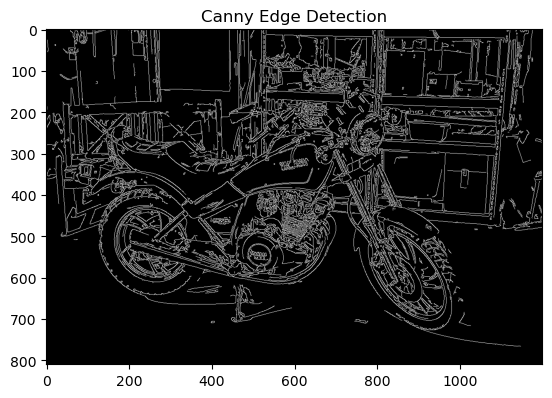

In [19]:
# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png", 0)

# Apply Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.show()


#### Region Growing
Region Growing is a region-based segmentation technique used in image processing to segment an image into regions based on predefined criteria, such as pixel intensity or texture. The main idea is to start from an initial seed point and grow a region by adding neighboring pixels that are similar to the seed pixel according to a certain similarity measure.

How Region Growing Works:

Seed Selection: Choose one or more initial points (seeds) within the image. These seeds can be selected manually or automatically based on specific criteria (e.g., pixel intensity).

Region Growing: Starting from the seed point, neighboring pixels are examined and added to the region if they meet certain similarity criteria (e.g., similarity in intensity or texture).

Stop Criteria: The growing process continues until a stopping condition is met, such as:

The neighboring pixels no longer meet the similarity threshold.
The region reaches a certain size or boundaries.

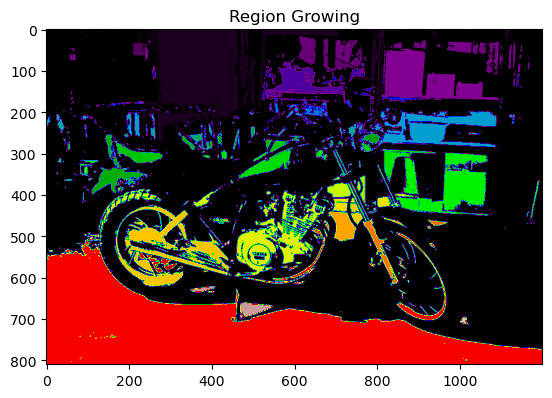

In [21]:
# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png", 0)

# Convert the image to a binary image (for simplicity)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Use region growing to find regions
labels = measure.label(thresh, connectivity=2)

# Display the result
plt.imshow(labels, cmap='nipy_spectral')
plt.title("Region Growing")
plt.show()


#### "K-means Clustering"
K-means clustering is an unsupervised machine learning algorithm widely used for image segmentation and data clustering. It partitions data into K clusters by grouping similar points based on features like pixel color or intensity. The algorithm starts by randomly selecting K centroids and then assigns each data point to the nearest centroid. The centroids are updated by computing the mean of the assigned points, and the process is repeated until convergence. K-means is efficient and simple but requires specifying the number of clusters (K) beforehand, and its results can be sensitive to initial centroid selection.

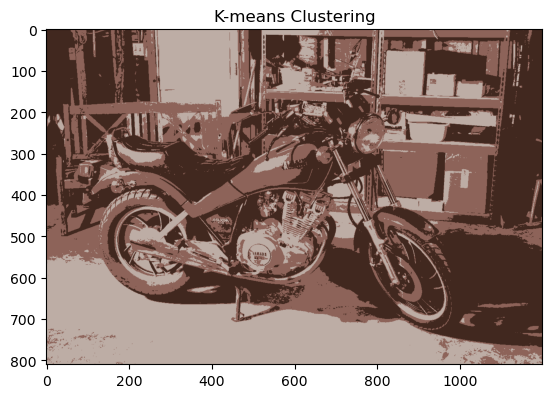

In [23]:
# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixels = img.reshape((-1, 3))

# Apply K-means clustering
k = 3  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to 8-bit values
centers = np.uint8(centers)

# Map the labels to the center colors
segmented_img = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_img = segmented_img.reshape(img.shape)

# Display the result
plt.imshow(segmented_img)
plt.title("K-means Clustering")
plt.show()


#### "Watershed Segmentation"
Watershed Segmentation is an image segmentation technique inspired by the concept of watershed basins. It is particularly effective for segmenting images with overlapping objects or complex boundaries. The method treats an image as a topographic surface where pixel intensities represent heights. The idea is to simulate the process of flooding the surface from markers placed in different regions, where water "flows" from higher intensity areas to lower ones, forming basins.

In the watershed algorithm, local minima (low-intensity areas) are identified as catchment basins, and the boundaries between these basins are treated as the segmented regions. The algorithm uses markers, often based on gradient or edge information, to define initial regions and control the segmentation process.

Watershed segmentation can be sensitive to noise and over-segmentation, especially in images with weak or ambiguous boundaries. However, it is powerful for segmenting complex and irregular objects, and it can be refined with pre-processing steps like smoothing.

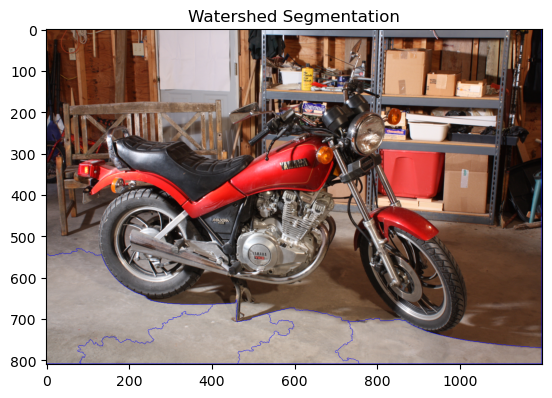

In [45]:
# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to get a binary image
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Remove noise using morphology
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(thresh, kernel, iterations=3)
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convert both sure_bg and sure_fg to the same type (uint8)
sure_bg = np.uint8(sure_bg)
sure_fg = np.uint8(sure_fg)

# Subtract sure foreground from sure background to get unknown regions
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers
ret, markers = cv2.connectedComponents(sure_fg)

# Apply watershed algorithm
markers = markers + 1
markers[unknown == 255] = 0
cv2.watershed(img, markers)

# Mark boundaries with red
img[markers == -1] = [255, 0, 0]

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.show()



#### "Graph-Based Segmentation (Felzenszwalb)"
Graph-Based Segmentation (Felzenszwalb's Algorithm) is a region-based image segmentation method that partitions an image into meaningful regions by analyzing the relationships between neighboring pixels. It treats an image as a graph where each pixel is a node connected to its neighboring pixels. The edges between the nodes are weighted based on the similarity (e.g., color, intensity) between adjacent pixels. The goal of Felzenszwalb's algorithm is to merge regions in the graph that have similar characteristics while keeping boundaries intact.

The algorithm uses a greedy merging process, where regions are iteratively merged if their similarity exceeds a defined threshold, called the "minimum similarity" (controlled by a parameter like scale). It employs an efficient, minimum spanning tree approach to minimize computational complexity, making it faster and scalable for larger images.

Felzenszwalb's method is robust, preserving edges while grouping similar pixels into coherent regions, making it widely used in object detection and image analysis tasks.

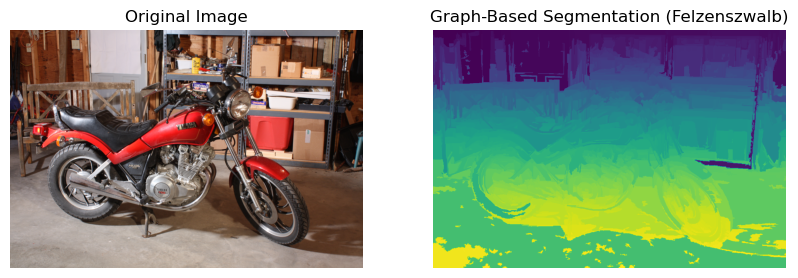

In [39]:
import cv2
import matplotlib.pyplot as plt
from skimage import segmentation
from skimage.color import rgb2lab

# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Use graph-based segmentation (Felzenszwalb's algorithm)
segments = segmentation.felzenszwalb(img_rgb, scale=100, sigma=0.5, min_size=50)

# Set up the subplot to show the original and segmented images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display the result of Felzenszwalb's segmentation
axs[1].imshow(segments)
axs[1].set_title("Graph-Based Segmentation (Felzenszwalb)")
axs[1].axis('off')

# Show the plot
plt.show()



#### "SLIC Superpixel Segmentation"
SLIC (Simple Linear Iterative Clustering) Superpixel Segmentation is an efficient algorithm used for partitioning an image into perceptually meaningful regions called "superpixels." Superpixels are clusters of pixels that share similar colors and spatial proximity. The goal of SLIC is to simplify the image representation by reducing the number of elements to process while preserving important structures.

SLIC operates by dividing the image into a regular grid of superpixels and then refining the grid iteratively using the k-means clustering algorithm. The algorithm minimizes both color and spatial distances, ensuring that the resulting superpixels are compact, uniform, and aligned with image boundaries. This helps in segmenting the image into homogeneous regions that are easier to analyze.

SLIC is computationally efficient due to its simple initialization and iterative optimization. It is widely used in computer vision tasks, such as object recognition, segmentation, and image processing, as it reduces complexity without losing critical information.

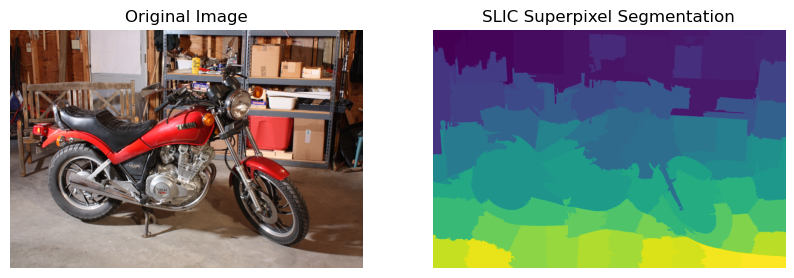

In [35]:
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import rgb2lab

# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Convert the image to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Apply SLIC superpixel segmentation
segments_slic = slic(img_lab, n_segments=100, compactness=10)

# Set up the subplot to show the original and segmented images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display the SLIC superpixel segmentation result
axs[1].imshow(segments_slic)
axs[1].set_title("SLIC Superpixel Segmentation")
axs[1].axis('off')

# Show the plot
plt.show()


#### "Contour Detection"
Contour Detection is a technique used in image processing to identify the boundaries or shapes of objects within an image. It involves detecting continuous lines or curves that represent the transitions between different regions with varying intensities or colors. Contours are essential in many computer vision tasks, such as object recognition, shape analysis, and image segmentation.

The most common method for contour detection is through edge detection, where algorithms like Canny Edge Detection or Sobel filters are used to highlight regions with significant intensity changes. Once the edges are identified, algorithms like findContours in OpenCV are used to trace the boundaries of objects.

Contours provide valuable information about the geometry and structure of objects, and they can be used to:

Extract shapes from an image.

Detect objects for further analysis or recognition.

Analyze the spatial properties of detected objects.

Contour detection is widely applied in applications like image analysis, robotic vision, medical imaging, and pattern recognition.

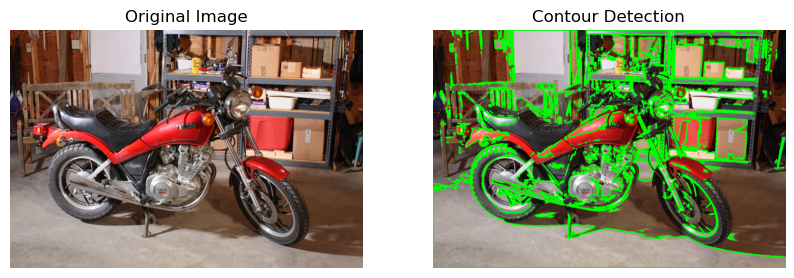

In [31]:


# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to get a binary image
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contour_img = img.copy()  # Create a copy of the original image to draw contours
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 3)

# Set up the subplot to show the original and contour-detected images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display the contour-detected image
axs[1].imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display
axs[1].set_title("Contour Detection")
axs[1].axis('off')

# Show the plot
plt.show()


#### Fuzzy C-means Clustering
Fuzzy C-means (FCM) Clustering is an unsupervised clustering algorithm that partitions data into C clusters, where each data point can belong to multiple clusters with varying degrees of membership, unlike traditional hard clustering methods like K-means. FCM is based on the idea that each point has a certain degree of membership to each cluster, which is controlled by a membership value between 0 and 1.

In FCM, the objective is to minimize the weighted sum of squared distances between data points and the cluster centroids, with the membership values affecting the weighting. The algorithm iterates to update the centroids and membership values until convergence. The degree of membership is influenced by a fuzziness parameter (typically denoted as m), which controls the level of overlap between clusters.

FCM is particularly useful in situations where data points are uncertain or ambiguous, as it allows for soft assignment of points to clusters, making it suitable for applications in image segmentation, pattern recognition, and bioinformatics.

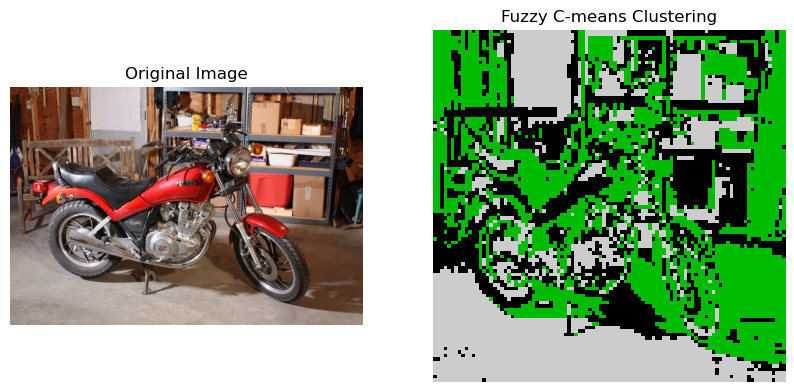

In [29]:

# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to a smaller size to speed up processing
img_resized = cv2.resize(img_rgb, (100, 100))  # Resize to 100x100

# Reshape image to 2D
pixels = img_resized.reshape((-1, 3))

# Apply Fuzzy C-means clustering with optimizations
# - Reduced maxiter (iterations) to speed up
# - Increased error tolerance to stop earlier
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pixels.T, 3, 2, error=0.05, maxiter=500)

# Assign each pixel to the cluster with the highest membership
cluster_map = np.argmax(u, axis=0).reshape(img_resized.shape[0], img_resized.shape[1])

# Set up the subplot to show the original and clustered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display the clustered image
axs[1].imshow(cluster_map, cmap='nipy_spectral')
axs[1].set_title("Fuzzy C-means Clustering")
axs[1].axis('off')

# Show the plot
plt.show()


#### Mean-Shift Clustering
Mean-Shift Clustering is an iterative, non-parametric clustering algorithm used to find dense regions in a dataset by shifting data points towards the mode (peak) of the data distribution. Unlike methods like K-means, it does not require the number of clusters to be specified beforehand. The algorithm works by iteratively shifting each data point to the average of points within a given neighborhood defined by a bandwidth parameter.

The steps of Mean-Shift are as follows:

For each data point, compute the mean of the points within its neighborhood.  
Shift the point towards this mean.  
Repeat the process until convergence, i.e., when the shift becomes negligible. 

Mean-Shift clustering is particularly effective for datasets with irregularly shaped clusters and can adapt to the structure of the data. It is widely used in image segmentation, object tracking, and other tasks where detecting the underlying structure of the data is important.

While it does not require the number of clusters, selecting an appropriate bandwidth parameter is crucial for performance.

In [ ]:

# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to a smaller size to speed up processing
img_resized = cv2.resize(img_rgb, (100, 100))  # Resize to 100x100

# Reshape image to 2D
pixels = img_resized.reshape((-1, 3))

# Apply Mean-Shift clustering
mean_shift = MeanShift(bandwidth=30, bin_seeding=True)  # Initialize MeanShift with appropriate bandwidth
mean_shift.fit(pixels)

# Get the segmented labels
labels = mean_shift.labels_

# Reshape the labels back to the original image shape
cluster_map = labels.reshape(img_resized.shape[0], img_resized.shape[1])

# Set up the subplot to show the original and clustered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display the clustered image
axs[1].imshow(cluster_map, cmap='nipy_spectral')
axs[1].set_title("Mean-Shift Clustering")
axs[1].axis('off')

# Show the plot
plt.show()


#### "HSV Color Space Thresholding
HSV (Hue, Saturation, Value) Color Space Thresholding is a technique used in image processing for segmenting objects based on their color characteristics. Unlike the RGB color space, which is based on the combination of Red, Green, and Blue channels, the HSV color space separates the chromatic content (Hue) from intensity (Saturation and Value), making it more intuitive for color-based segmentation.

In HSV, Hue represents the color type (e.g., red, blue, green), Saturation indicates the color's vibrancy, and Value refers to the brightness of the color. By thresholding specific ranges of Hue, Saturation, or Value, objects of particular colors can be isolated from the background, regardless of lighting conditions.

Thresholding in the HSV space typically involves setting minimum and maximum values for these channels to create a mask that highlights the desired color regions. This technique is widely used in tasks like object detection, tracking, and image segmentation, where color plays a key role in distinguishing objects from the background.

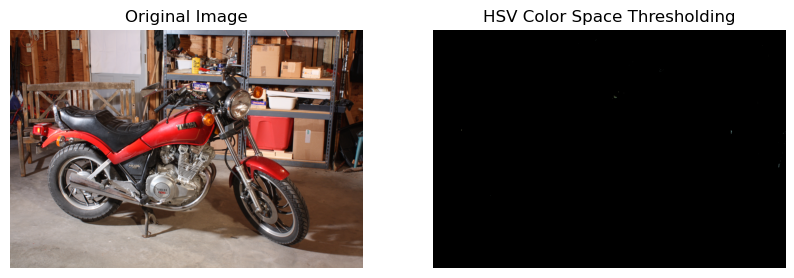

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range of colors in HSV space (for yellow)
lower_bound = np.array([30, 50, 50])  # Lower bound for yellow
upper_bound = np.array([90, 255, 255])  # Upper bound for yellow

# Create a mask using the color range
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# Bitwise AND to get the segmented portion of the image
segmented = cv2.bitwise_and(img, img, mask=mask)

# Convert BGR to RGB for correct display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
segmented_rgb = cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)

# Set up the subplot to show the original and segmented images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(img_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display the segmented image
axs[1].imshow(segmented_rgb)
axs[1].set_title("HSV Color Space Thresholding")
axs[1].axis('off')

# Show the plot
plt.show()


#### GrabCut Segmentation
GrabCut Segmentation is an advanced image segmentation technique used to separate the foreground from the background in images. It is an interactive, graph-based algorithm that requires minimal user input to achieve accurate segmentation results. GrabCut is often used for tasks such as object extraction and background removal.

The algorithm works by modeling the image as a graph, where each pixel is a node. The algorithm then classifies pixels as either foreground or background based on their color and spatial information. It uses a Gaussian Mixture Model (GMM) to model the color distribution of foreground and background regions.

The process involves the following steps:

User Input: The user provides an initial rough segmentation by marking the foreground and background areas with a rectangle or scribbles.   
Graph Construction: GrabCut constructs a graph where edges represent pixel relationships based on color similarity and proximity.    
Graph Cut Optimization: The algorithm iteratively refines the segmentation using graph cut optimization to minimize the energy function and improve accuracy.     

GrabCut works well even with complex images containing varying textures and lighting conditions, making it widely used in object extraction, background replacement, and photo editing.

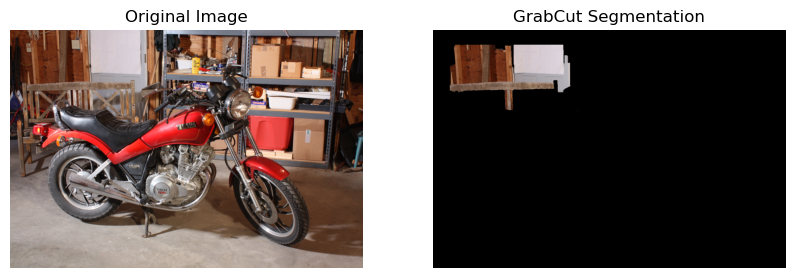

In [11]:
# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")

# Define a mask (to specify regions for GrabCut)
mask = np.zeros(img.shape[:2], np.uint8)

# Define the background and foreground models (needed for GrabCut)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Run GrabCut
cv2.grabCut(img, mask, (50, 50, 450, 290), bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create a mask of the segmented part
seg_img = img * mask2[:, :, np.newaxis]

# Blend the original image with the segmented part (background set to black)
result = img.copy()
result[mask2 == 0] = [0, 0, 0]  # Set the non-segmented part to black (or any other color)

# Display both the original and the segmented result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# GrabCut result
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("GrabCut Segmentation")
plt.axis('off')

plt.show()


#### Simple Thresholding
Simple Thresholding is a basic image segmentation technique used to separate objects from the background based on pixel intensity values. It involves converting a grayscale image into a binary image by comparing each pixel's intensity to a predefined threshold. If a pixel's intensity is greater than the threshold, it is classified as foreground (usually assigned a value of 255, representing white), and if it is less than the threshold, it is classified as background (assigned a value of 0, representing black).

The thresholding process can be mathematically represented as:

If pixel intensity > threshold, set pixel value = 255 (foreground).   
If pixel intensity <= threshold, set pixel value = 0 (background).    
Simple thresholding is fast and easy to implement, making it ideal for applications with clear and high-contrast images. However, it is sensitive to lighting conditions and may not work well in images with varying illumination or overlapping foreground and background. To handle these cases, more advanced thresholding methods, such as Otsu's Thresholding, are often preferred.

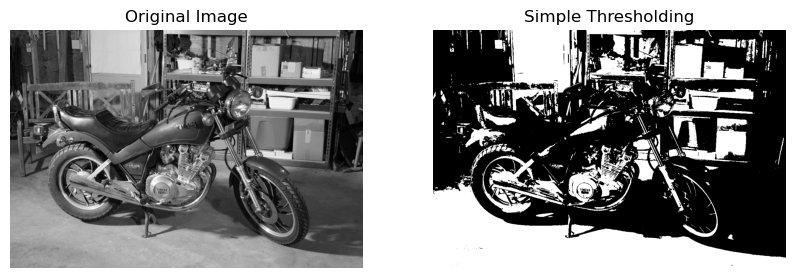

In [17]:


# Load the original image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png", 0)

# Apply simple thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Set up the subplot to show original and thresholded images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display the thresholded image
axs[1].imshow(thresh, cmap='gray')
axs[1].set_title("Simple Thresholding")
axs[1].axis('off')

# Show the plot
plt.show()


#### "Active Contour (Level Set)"
Active Contour (Level Set) is an advanced image segmentation technique used to delineate boundaries of objects in an image. It is also known as the snakes algorithm and is based on the idea of evolving a curve, or contour, to fit the shape of an object in the image. The curve evolves under the influence of both internal forces (which maintain smoothness) and external forces (which pull the curve towards edges or object boundaries).

The Level Set Method is a mathematical framework for active contour models that represents the contour as a level set of a higher-dimensional function. The contour is implicitly defined by a level set function, which evolves over time according to a set of partial differential equations (PDEs). This allows the contour to move and adapt to the object’s boundaries.

The basic steps in active contour using level sets are:

Initialization: An initial curve or contour is placed near the object of interest.    
Evolution: The contour evolves iteratively by solving a PDE, influenced by edge information (external force) and smoothness constraints (internal force).    
Convergence: The contour converges to the object boundaries, providing a precise segmentation. 

   Active contour models are powerful for segmenting complex shapes in noisy or low-contrast images, making them ideal for medical imaging, object tracking, and other tasks where precise boundaries are crucial. However, they can be computationally expensive and may require careful initialization for optimal results.

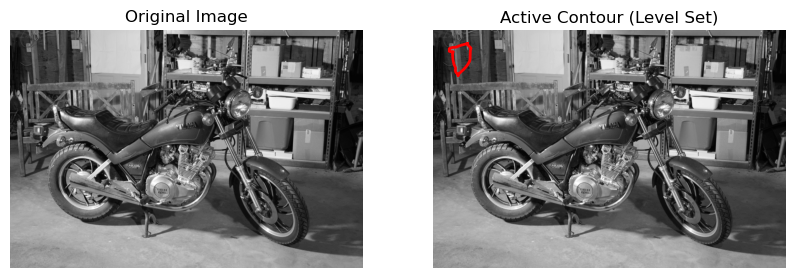

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import segmentation, filters

# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian filter to smooth the image
smoothed_img = filters.gaussian(img_gray, sigma=1)

# Define the initial contour (this can be a circle or any other shape)
# For simplicity, we will initialize a contour as a circle in the center of the image
s = np.linspace(0, 2 * np.pi, 400)
x = np.sin(s) * 50 + 100  # Center of the circle at (100, 100)
y = np.cos(s) * 50 + 100  # Radius = 50

# Stack x and y coordinates to create an initial contour
init_contour = np.array([y, x]).T

# Apply active contour (Level Set Method)
snake = segmentation.active_contour(smoothed_img, init_contour, alpha=0.015, beta=10, gamma=0.001)

# Visualize the result
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Show image with the active contour (level set)
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("Active Contour (Level Set)")
ax[1].plot(snake[:, 1], snake[:, 0], '-r', lw=2)  # Plot the active contour
ax[1].axis('off')

plt.show()


#### "Local Binary Pattern (LBP) Texture Segmentation"
Local Binary Pattern (LBP) Texture Segmentation is a method used for texture classification and segmentation in image processing. LBP is a simple yet powerful technique that transforms an image into a texture descriptor by analyzing the local structure around each pixel. It is particularly useful for identifying patterns in texture-rich images where pixel intensity variations are subtle.

The LBP operator works by comparing each pixel in the image to its neighboring pixels (typically in a 3x3 window). For each pixel, a binary code is generated by thresholding the surrounding pixels: if a neighboring pixel has a greater intensity than the central pixel, it is assigned a value of 1, otherwise 0. The binary values are then concatenated to form a unique pattern for that pixel. This binary number is often converted to a decimal number, which serves as a texture feature.

Steps involved in LBP-based texture segmentation:

LBP Calculation: For each pixel, calculate the LBP using its neighbors.   
Pattern Mapping: Convert the binary patterns into numerical values to represent textures.   
Segmentation: Segment the image by grouping pixels with similar LBP values, highlighting areas with similar texture patterns. 

LBP is highly efficient, computationally inexpensive, and invariant to monotonic illumination changes, making it widely used in applications like facial recognition, texture classification, and image segmentation. However, it can be sensitive to noise and may not perform well on images with complex textures.

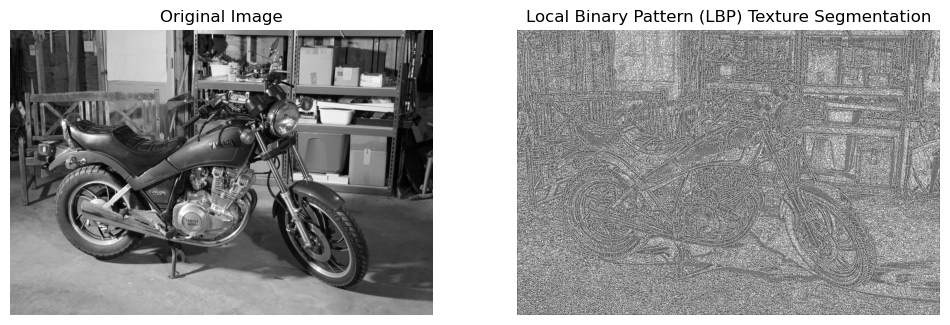

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Load the image
img = cv2.imread(r"C:\Users\yashu\Pictures\im1_1200.png", cv2.IMREAD_GRAYSCALE)

# Parameters for Local Binary Pattern
radius = 1  # Radius of the LBP
n_points = 8 * radius  # Number of points (8 * radius)

# Calculate the LBP (Local Binary Pattern)
lbp = local_binary_pattern(img, n_points, radius, method="uniform")

# Calculate the histogram of the LBP
lbp_hist, bins = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))

# Normalize the histogram
lbp_hist = lbp_hist.astype("float")
lbp_hist /= (lbp_hist.sum() + 1e-6)

# Display the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

# Show LBP result (texture features)
ax[1].imshow(lbp, cmap='gray')
ax[1].set_title("Local Binary Pattern (LBP) Texture Segmentation")
ax[1].axis('off')

plt.show()


## Conclusion 
In image segmentation, various techniques are employed to partition an image into meaningful regions for further analysis, with each method having its strengths and weaknesses. Simple Thresholding offers a fast and easy way to separate objects based on pixel intensity but is limited in handling complex images with varying lighting conditions. Active Contour (Level Set) provides more flexibility by evolving a contour to fit object boundaries but requires careful initialization and can be computationally expensive.

Fuzzy C-means Clustering allows soft assignment of pixels to multiple clusters based on membership degrees, making it useful for situations where boundaries are not sharply defined. K-means Clustering segments an image by grouping similar pixels into hard clusters, but requires a predefined number of clusters and may struggle with non-circular shapes.

Watershed Segmentation effectively handles overlapping objects by treating pixel intensity as topography but can suffer from over-segmentation. GrabCut Segmentation and SLIC Superpixel Segmentation both excel at isolating foreground from background and grouping pixels into compact regions, respectively, but may require user input for optimal performance.

HSV Color Space Thresholding and Canny Edge Detection are effective for identifying regions based on color or edges, while Mean-Shift Clustering and Graph-Based Segmentation provide robust methods for segmenting irregular shapes without needing predefined parameters. Contour Detection and Local Binary Pattern (LBP) Texture Segmentation focus on extracting object boundaries and texture features, respectively, for detailed segmentation.

Each method has its ideal use case depending on the complexity of the image, the type of objects being segmented, and the computational resources available. Combining these techniques can often yield more accurate and robust segmentation results for complex images.